In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from scipy.linalg import svd
import urllib.request
from PIL import Image

In [ ]:
## Use Dimensions Reduction funciton to display desired
## number of dimensions
def DimReduce(u,s,v,dims,shape):

  ##  Create blank array to store reduced img
  AR = np.zeros(shape)

  if dims>min(shape): dims = min(shape)

  for i  in range(dims):

    ## transform the ith column of u into a column vector
    U = np.resize(u[:,i],(np.size(u[:,i]),1))
    S = s[i]  ##  Save the ith diagonal of s
    ## transform the ith row of v into a row vector
    V = np.resize(v[i,:],(1,np.size(v[i,:])))
    US = U*S  ##  Scale U by S

    ## Multiply US by V
    dim = np.dot(US, V)

    ## Add the dimension to the blank array/update image array
    AR = AR + dim

  return AR

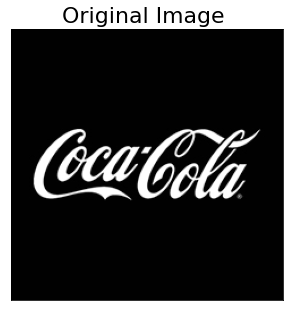

In [ ]:
urllib.request.urlretrieve('https://us.coca-cola.com/content/dam/nagbrands/us/coke/en/participating-brands/logo_coke.jpg',
                           'image.png')

img = Image.open("image.png").convert("L")

img = np.array(img)

plt.figure(1,(5,5))
plt.title("Original Image ",fontsize=22)

plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()



In [ ]:
u,s,v = svd(img)
shape = np.shape(img) ## Save image array dimensions for reconstruction


NR = 15

AR15 = DimReduce(u,s,v,NR,shape)

NR = 30

AR30 = DimReduce(u,s,v,NR,shape)

NR = 50

AR50 = DimReduce(u,s,v,NR,shape)


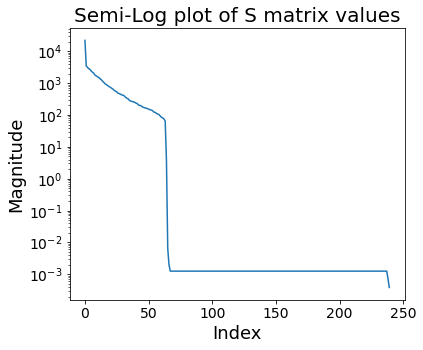

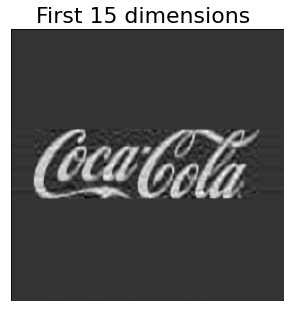

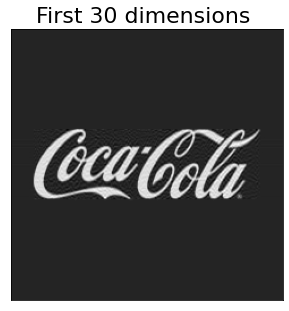

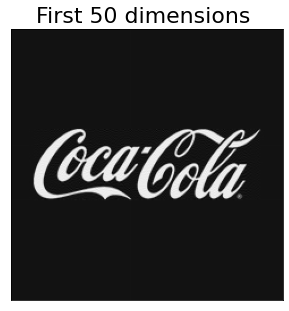

In [ ]:
## Display the diagonals
plt.figure(2,(6,5))
plt.semilogy(s)
plt.title("Semi-Log plot of S matrix values",fontsize = 20)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Magnitude",fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## Plot the dim reduced images
print('\n\n')
plt.figure(3,figsize=(5, 5))
plt.imshow(AR15,cmap='gray')
plt.title("First 15 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()
print('\n\n')

plt.figure(4,figsize=(5, 5))
plt.imshow(AR30,cmap='gray')
plt.title("First 30 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()
print('\n\n')

plt.figure(5,figsize=(5, 5))
plt.imshow(AR50,cmap='gray')
plt.title("First 50 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [ ]:
edgeC = []

for i in y:
  if i == 0:
    edgeC.append('r')
  elif i == 1:
    edgeC.append('b')
  else:
    edgeC.append('g')


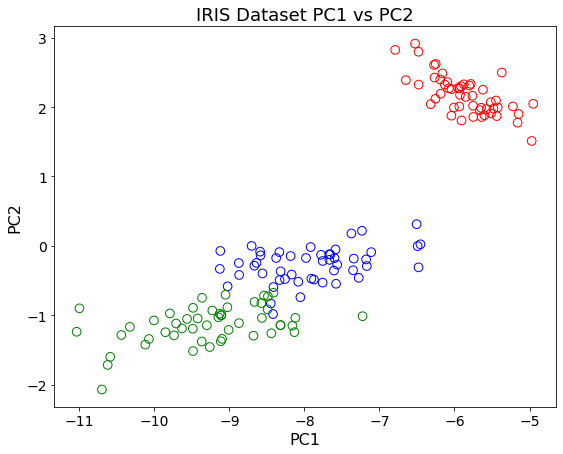

In [ ]:
u,s,v = svd(X)

v = np.transpose(v)

v2D = v[:,0:2]

x2D = np.matmul(X,v2D)

PC1 = x2D[:,0]
PC2 = x2D[:,1]

plt.figure(6,(9,7))
plt.scatter(PC1,PC2, facecolor='none',
            edgecolor = edgeC,s = 75)

plt.title("IRIS Dataset PC1 vs PC2",fontsize=18)
plt.xlabel("PC1",fontsize=16)
plt.ylabel("PC2",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()



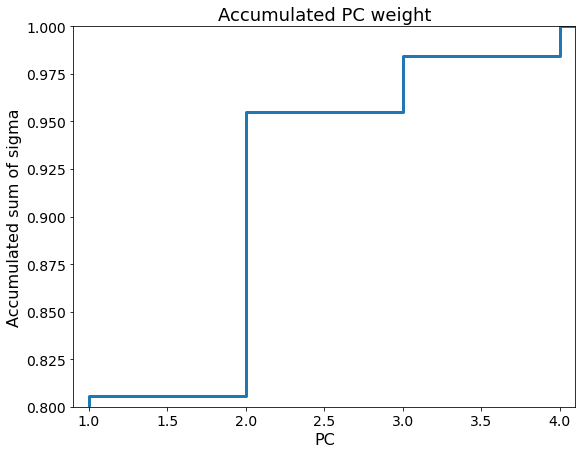



Weight of first two PCs is 95.5 %


In [ ]:
sv = np.diag(s)

acmSum = [0]
for i in np.cumsum(s)/np.sum(s):
  acmSum.append(i)


plt.figure(7, (9,7))
plt.step([1,2,3,4,5], acmSum,linewidth = 3)

plt.xlim([0.9,4.1])
plt.ylim([0.8,1])

plt.title("Accumulated PC weight",fontsize=18)
plt.xlabel("PC",fontsize=16)
plt.ylabel("Accumulated sum of sigma",fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

weight = acmSum[2]

print('\n\nWeight of first two PCs is %0.1f'%(weight*100),'%')